In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
! pip install pyforest

from pyforest import*

lazy_imports()

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15902 sha256=b14fff68fcb488b1cc8b55c12b0ed50598f4f7c1465fb862deffb3c99c0a264d
  Stored in directory: /root/.cache/pip/wheels/66/4f/3c/cbdf5336b5a84f39cb6e3d76eecb9acf3f99a2c072785afecc
Successfully built pyforest


['from sklearn.linear_model import LassoCV',
 'import seaborn as sns',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from PIL import Image',
 'import tensorflow as tf',
 'import statistics',
 'import imutils',
 'from sklearn.linear_model import ElasticNetCV',
 'from scipy import signal as sg',
 'import sys',
 'import altair as alt',
 'from sklearn import metrics',
 'import datetime as dt',
 'import plotly as py',
 'import nltk',
 'import pydot',
 'from scipy import stats',
 'from xlrd import open_workbook',
 'from sklearn.manifold import TSNE',
 'from pathlib import Path',
 'import statsmodels.api as sm',
 'import re',
 'from sklearn import svm',
 'import plotly.graph_objs as go',
 'import plotly.express as px',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.preprocessing import StandardScaler',
 'import sklearn',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.ensemble

In [78]:

file_path = 'https://raw.githubusercontent.com/a-mishra27/DataSet/refs/heads/main/breastCancer.csv'


In [79]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/a-mishra27/DataSet/refs/heads/main/breastCancer.csv")

In [8]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data pre-processing

In [9]:
data.shape

(699, 11)

In [10]:
data['class'].value_counts()

,count
class,
2,458
4,241


In [11]:
data.dtypes

,0
id,int64
clump_thickness,int64
size_uniformity,int64
shape_uniformity,int64
marginal_adhesion,int64
epithelial_size,int64
bare_nucleoli,object
bland_chromatin,int64
normal_nucleoli,int64
mitoses,int64


In [12]:
data['bare_nucleoli']

,bare_nucleoli
0,1
1,10
2,2
3,4
4,1
...,...
694,2
695,1
696,3
697,4


In [13]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [14]:
data[data['bare_nucleoli']=='?'].sum()

,0
id,13721250
clump_thickness,54
size_uniformity,39
shape_uniformity,46
marginal_adhesion,29
epithelial_size,39
bare_nucleoli,????????????????
bland_chromatin,50
normal_nucleoli,44
mitoses,16


In [15]:
digits_in_bare_nucleoli=pd.DataFrame(data.bare_nucleoli.str.isdigit())

In [16]:
#digits_in_bare_nucleoli

In [17]:
df=data.replace('?',np.nan)

<IPython.core.display.Javascript object>

In [18]:
df['bare_nucleoli']

,bare_nucleoli
0,1
1,10
2,2
3,4
4,1
...,...
694,2
695,1
696,3
697,4


In [19]:
df = df.apply(pd.to_numeric, errors='coerce')
df.median()

,0
id,1171710.0
clump_thickness,4.0
size_uniformity,1.0
shape_uniformity,1.0
marginal_adhesion,1.0
epithelial_size,2.0
bare_nucleoli,1.0
bland_chromatin,3.0
normal_nucleoli,1.0
mitoses,1.0


In [20]:
df=df.fillna(df.median())

In [21]:
df['bare_nucleoli']

,bare_nucleoli
0,1.0
1,10.0
2,2.0
3,4.0
4,1.0
...,...
694,2.0
695,1.0
696,3.0
697,4.0


In [22]:
df.dtypes

,0
id,int64
clump_thickness,int64
size_uniformity,int64
shape_uniformity,int64
marginal_adhesion,int64
epithelial_size,int64
bare_nucleoli,float64
bland_chromatin,int64
normal_nucleoli,int64
mitoses,int64


In [23]:
df['bare_nuclroli']=df['bare_nucleoli'].astype('int64')

## Exploratory Data Analysis

In [24]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,bare_nuclroli
0,1000025,5,1,1,1,2,1.0,3,1,1,2,1
1,1002945,5,4,4,5,7,10.0,3,2,1,2,10
2,1015425,3,1,1,1,2,2.0,3,1,1,2,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2,4
4,1017023,4,1,1,3,2,1.0,3,1,1,2,1


In [25]:
df.drop('id', axis=1,inplace=True)

In [26]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,bare_nuclroli
0,5,1,1,1,2,1.0,3,1,1,2,1
1,5,4,4,5,7,10.0,3,2,1,2,10
2,3,1,1,1,2,2.0,3,1,1,2,2
3,6,8,8,1,3,4.0,3,7,1,2,4
4,4,1,1,3,2,1.0,3,1,1,2,1


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


## Bivaraites Data Analysis

<IPython.core.display.Javascript object>

/tmp/ipython-input-729556929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

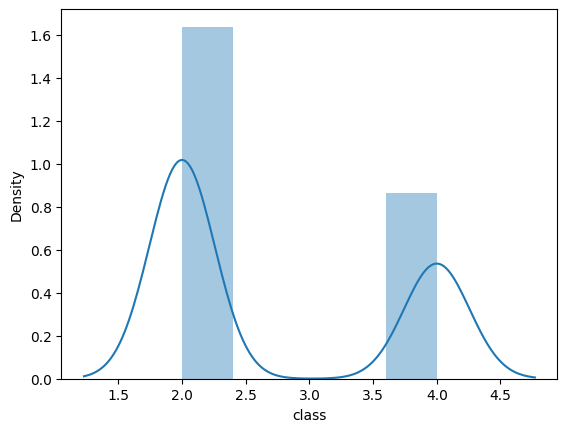

In [28]:
sns.distplot(df['class'])

## Multivate Data Analysis

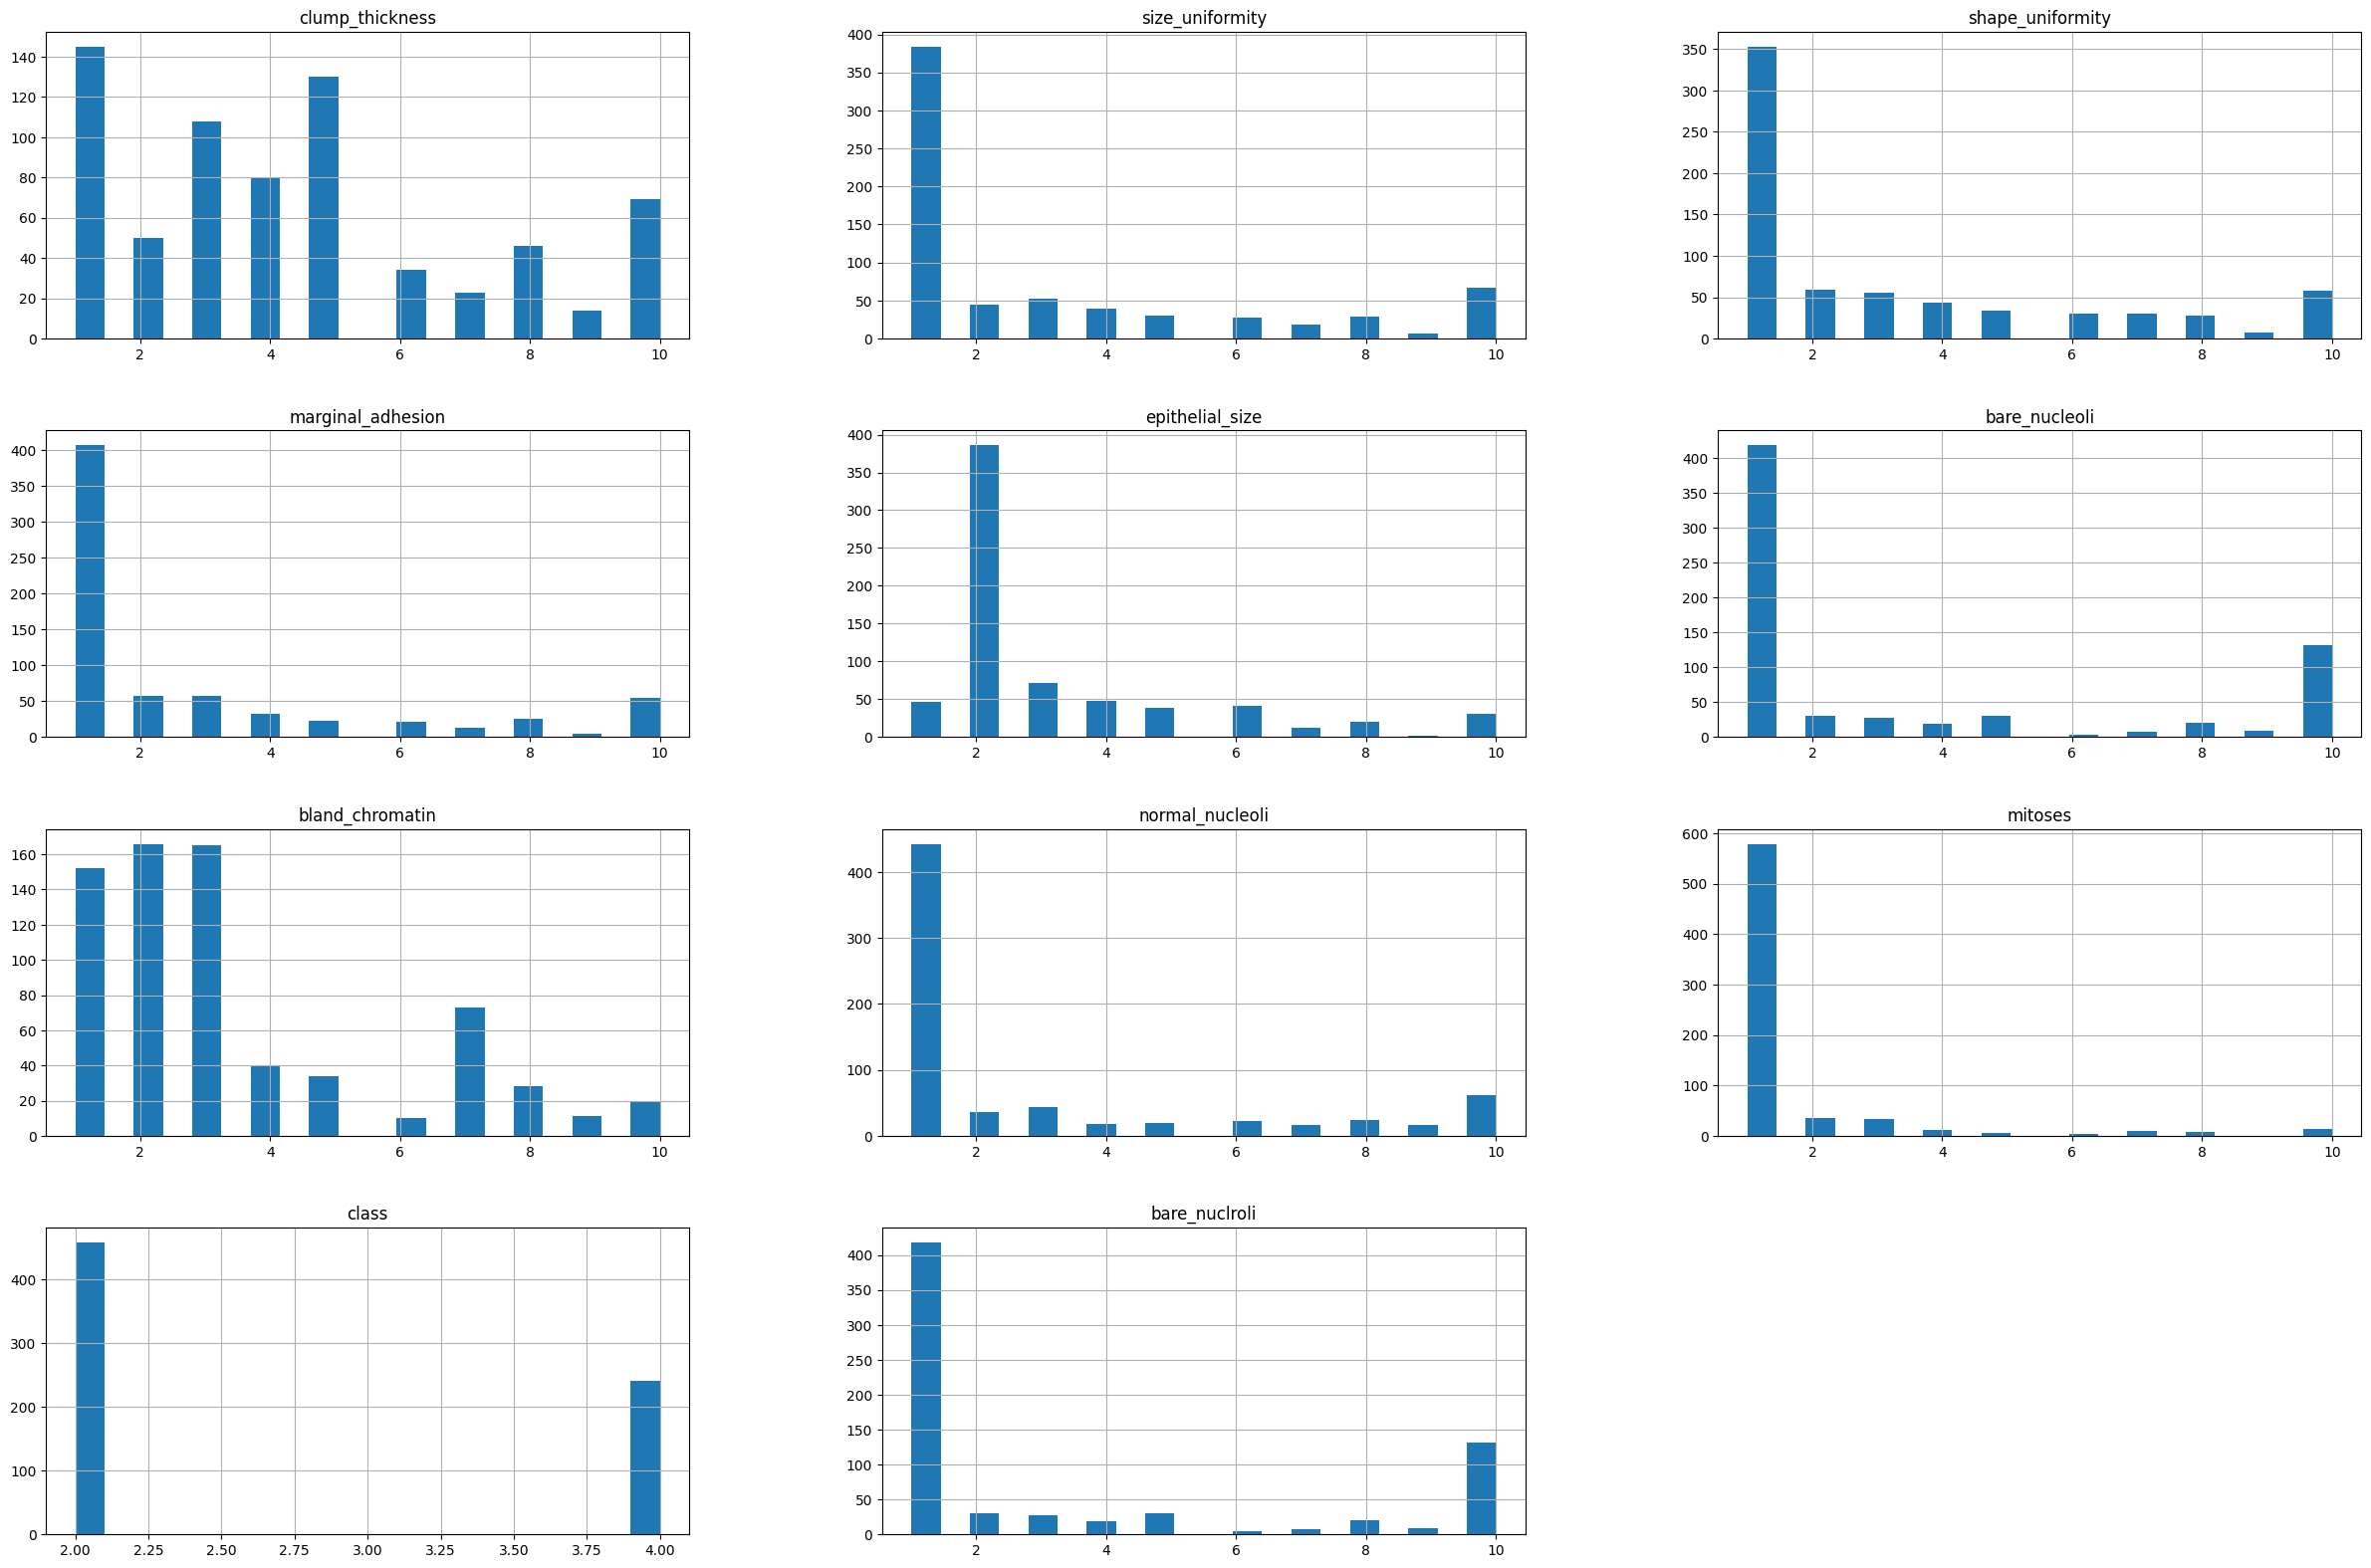

In [29]:
df.hist(bins=20, figsize=(30,30), layout =(6,3));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

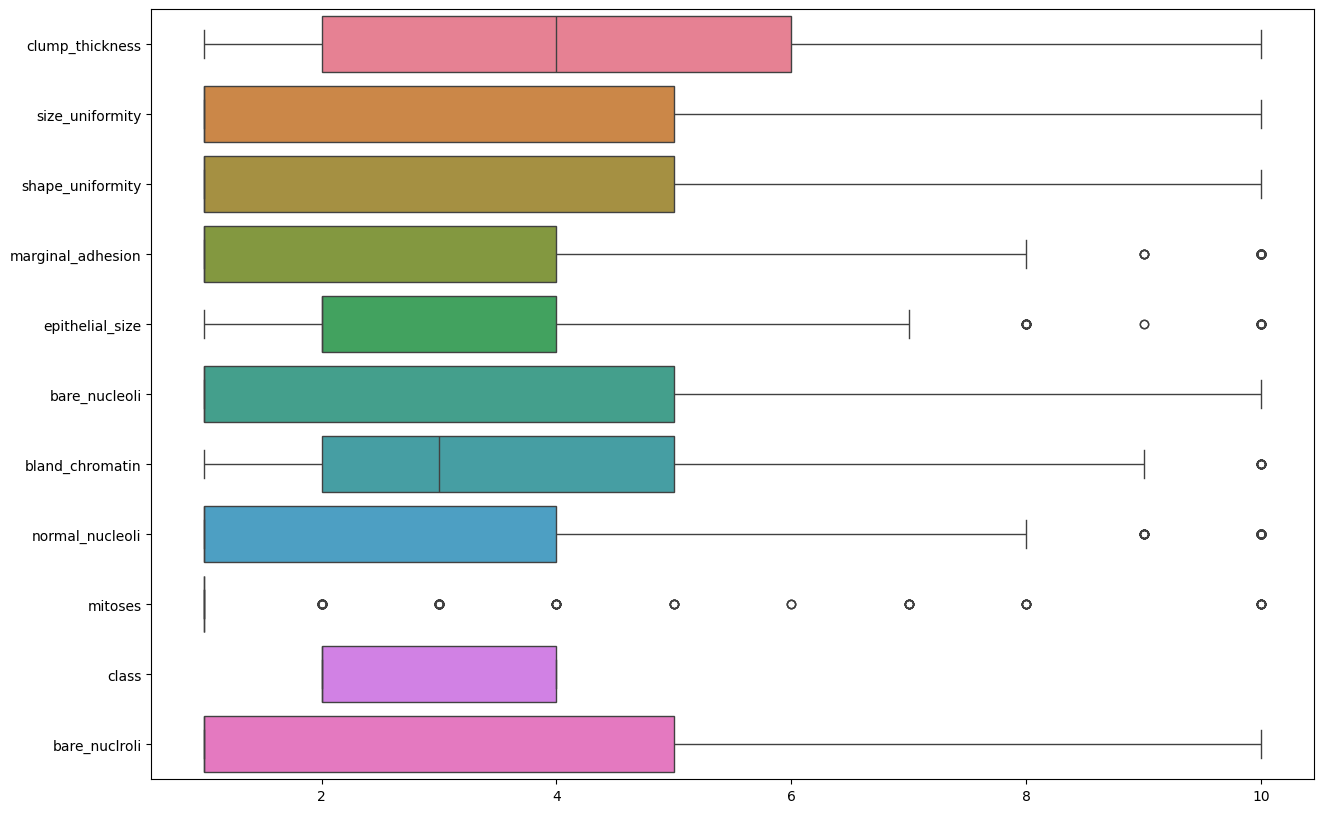

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient='h')

In [31]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,bare_nuclroli
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001,0.590008
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904,0.686673
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934,0.707474
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800,0.666971
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785,0.583701
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968,1.000000
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616,0.674215
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244,0.574778
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170,0.342397
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000,0.818968


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

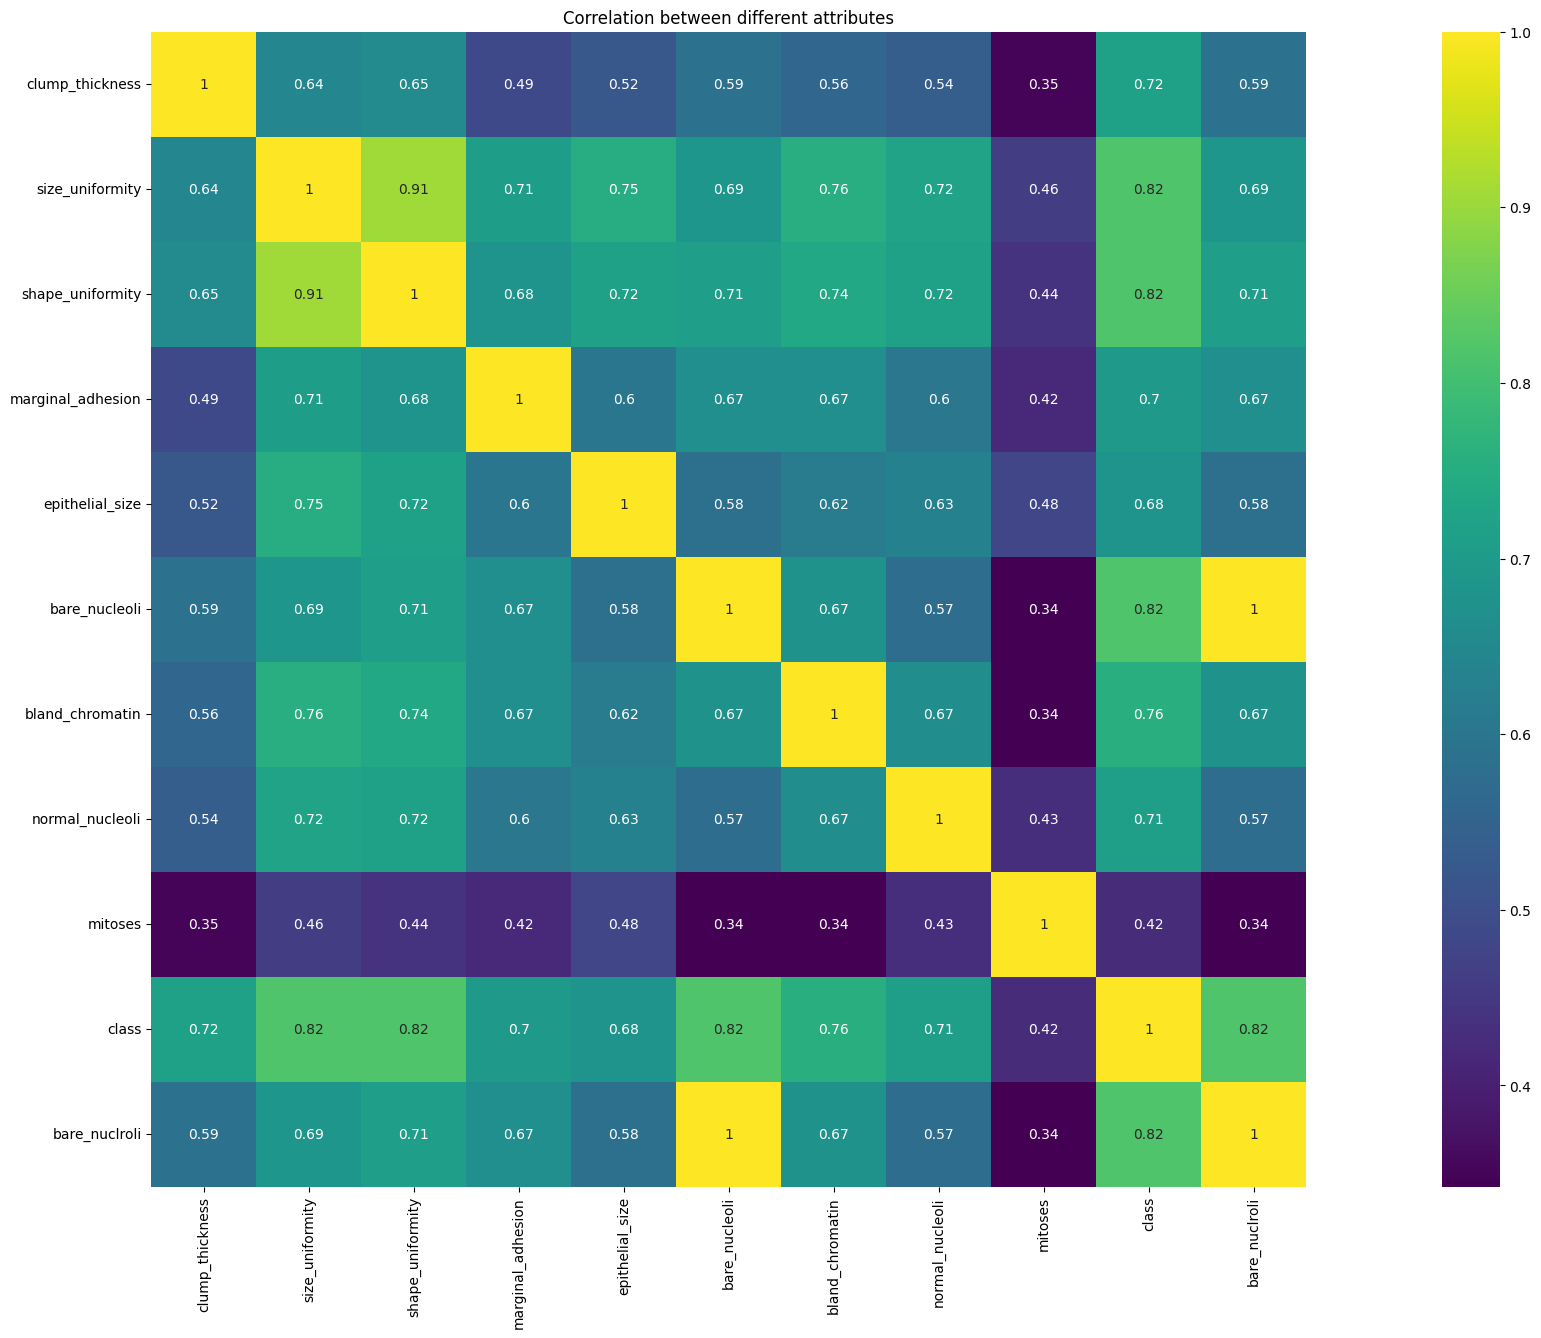

In [32]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(), vmax=1,square=True, annot= True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

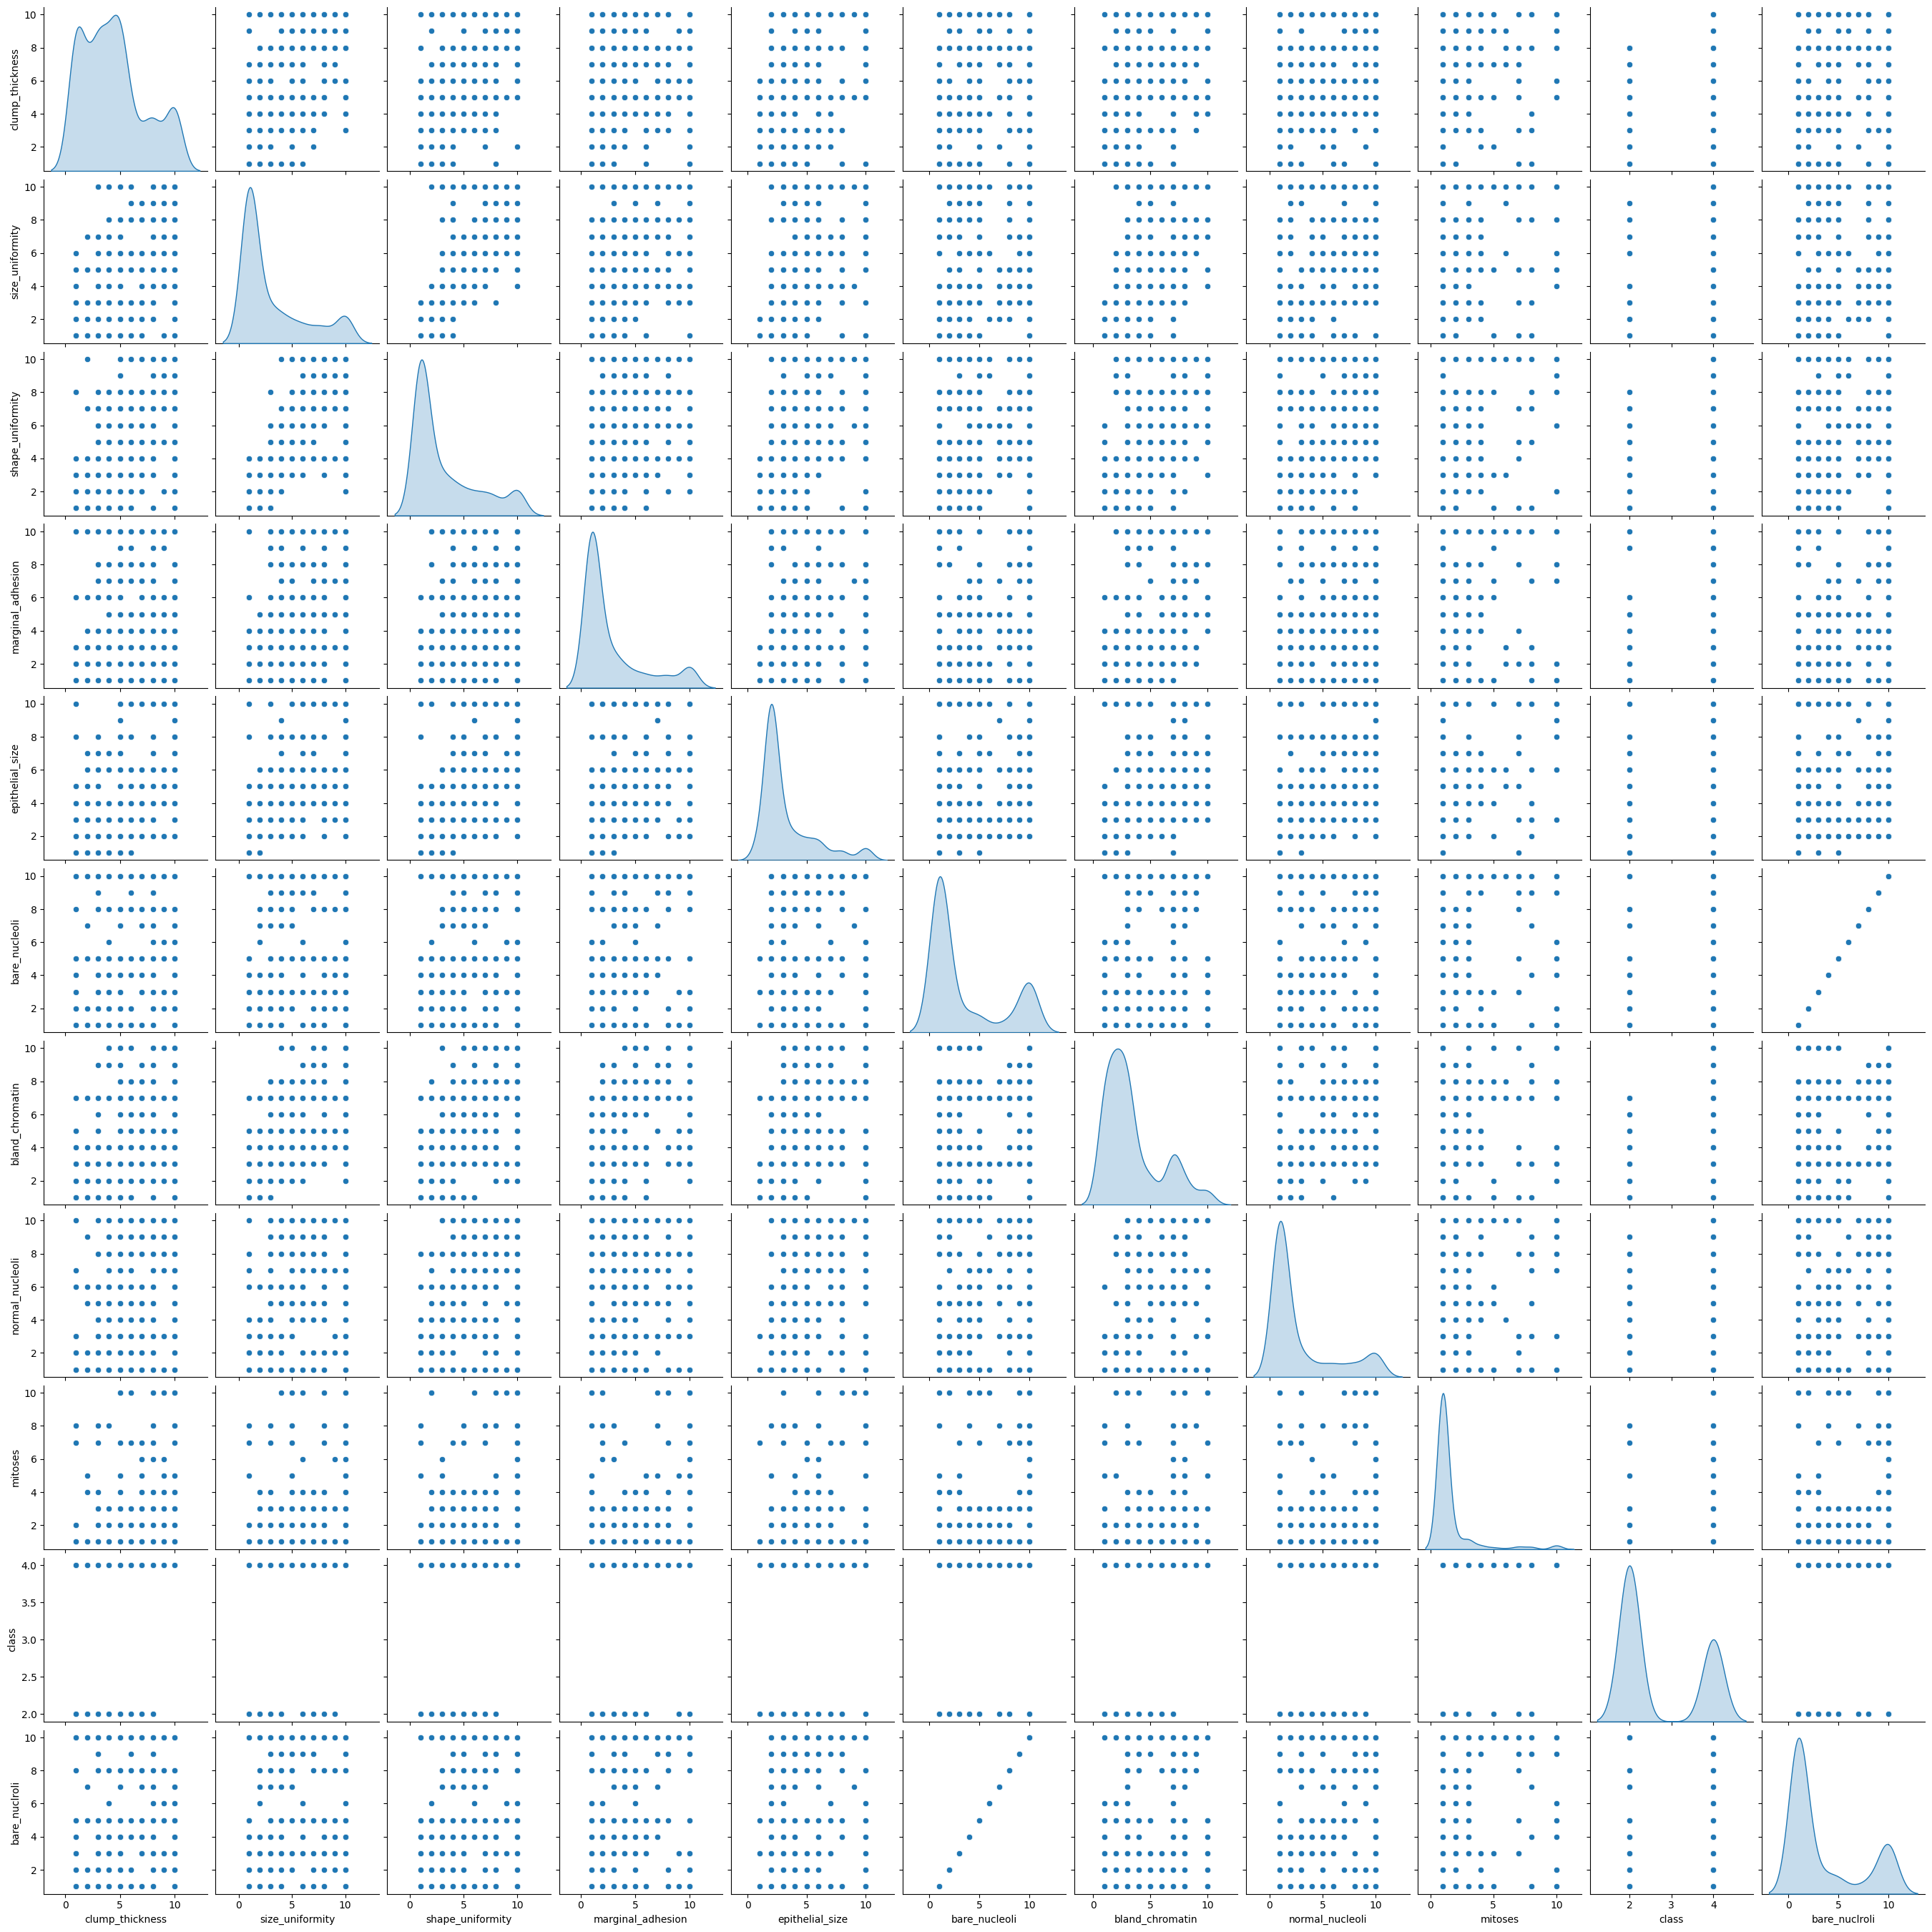

In [33]:
sns.pairplot(df, diag_kind = 'kde')

# Building our Model

In [34]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,bare_nuclroli
0,5,1,1,1,2,1.0,3,1,1,2,1
1,5,4,4,5,7,10.0,3,2,1,2,10
2,3,1,1,1,2,2.0,3,1,1,2,2
3,6,8,8,1,3,4.0,3,7,1,2,4
4,4,1,1,3,2,1.0,3,1,1,2,1


In [35]:
X=df.drop('class',axis=1)

y=df['class']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
##split70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [38]:
# Loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

# Loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

# Adding the 'target' column to the data frame
# In this dataset: 0 = Malignant (Cancerous), 1 = Benign (Not Cancerous)
data_frame['label'] = breast_cancer_dataset.target

<IPython.core.display.Javascript object>

In [39]:
# Print the first 5 rows
print("\n--- First 5 Rows ---")
display(data_frame.head())

# Get the number of rows and columns
print(f"\nDataset shape: {data_frame.shape[0]} rows and {data_frame.shape[1]} columns")

# Get technical information about the data
print("\n--- Data Info ---")
data_frame.info()

# Checking for missing (null) values
print("\n--- Missing Values Check ---")
print(data_frame.isnull().sum())
print("Result: No missing values found.")

# Get statistical measures (mean, std, min, max, etc.)
print("\n--- Statistical Summary ---")
display(data_frame.describe())

# Checking the distribution of the Target Variable (label)
print("\n--- Target Variable Distribution ---")
print(data_frame['label'].value_counts())
print("1 (Benign): 357")
print("0 (Malignant): 212")

# Grouping data by label to see the mean values of features
print("\n--- Mean Feature Values by Class ---")
display(data_frame.groupby('label').mean())
print("\nInsight: Malignant (0) tumors generally have larger feature values (e.g., mean radius, mean area).")


--- First 5 Rows ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Dataset shape: 569 rows and 31 columns

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error           

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000



--- Target Variable Distribution ---
label
1    357
0    212
Name: count, dtype: int64
1 (Benign): 357
0 (Malignant): 212

--- Mean Feature Values by Class ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442



Insight: Malignant (0) tumors generally have larger feature values (e.g., mean radius, mean area).



--- Generating EDA Visualizations ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-3392215975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data_frame, palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

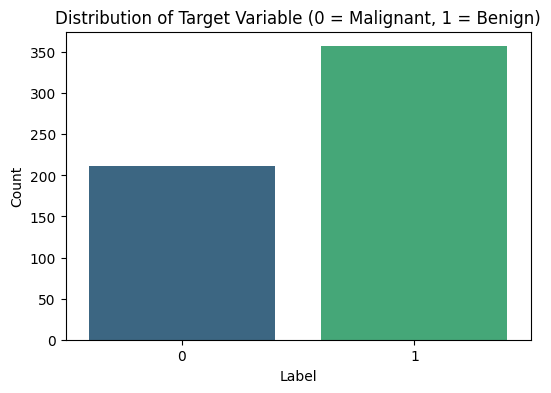

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

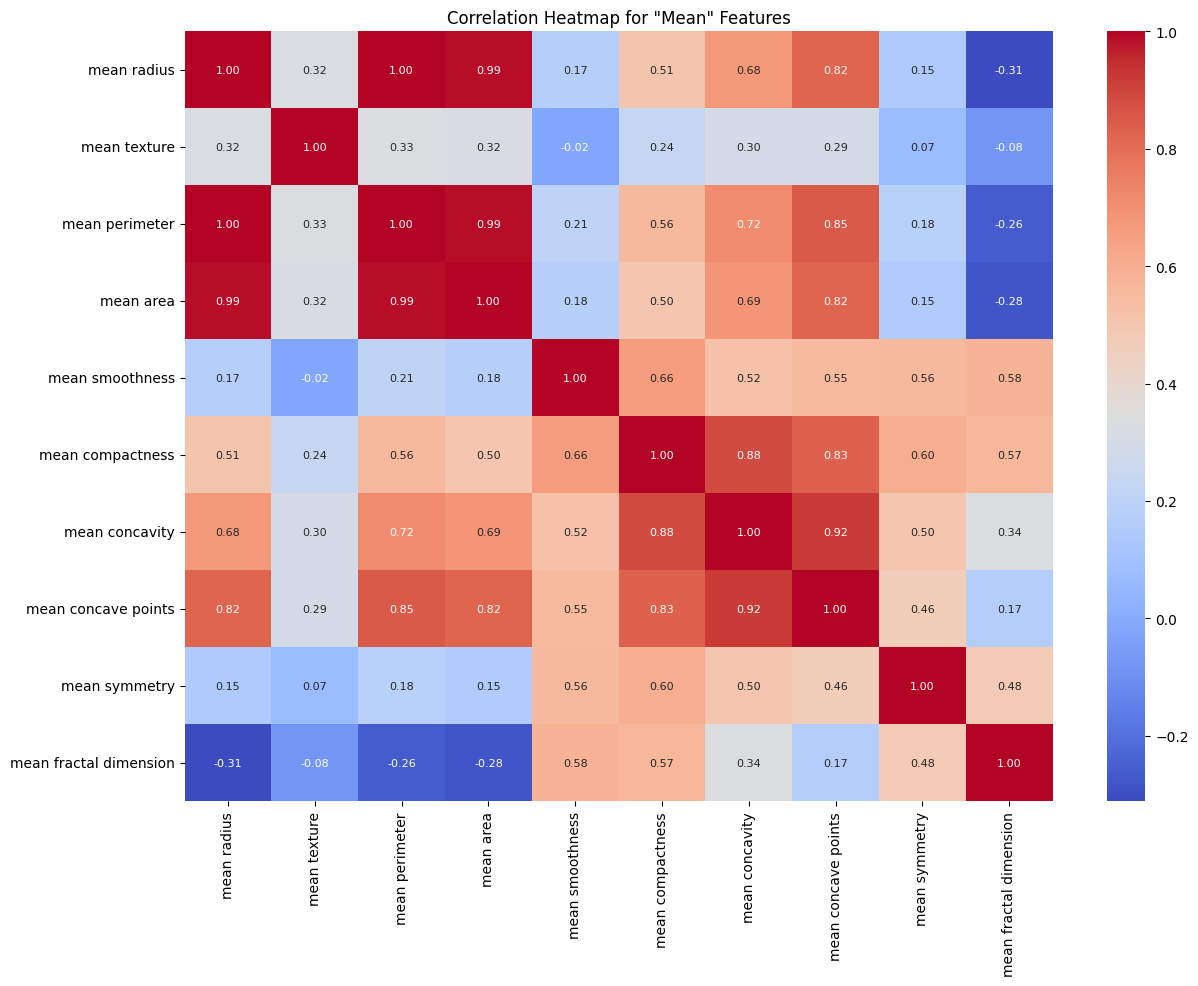

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-3392215975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='mean radius', data=data_frame, palette='pastel')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

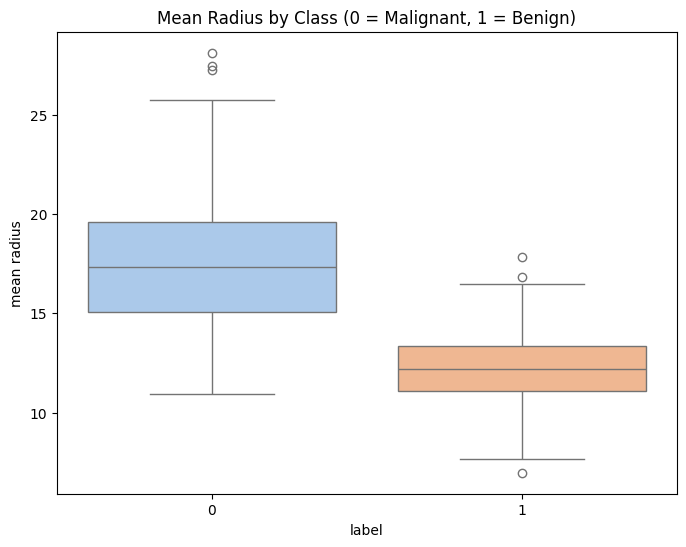

In [40]:
print("\n--- Generating EDA Visualizations ---")

# Plot 1: Distribution of the Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data_frame, palette='viridis')
plt.title('Distribution of Target Variable (0 = Malignant, 1 = Benign)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Plot 2: Correlation Heatmap
# A heatmap shows how features are related to each other.
# We'll just use the first 10 "mean" features for a cleaner plot.
plt.figure(figsize=(14, 10))
correlation_matrix = data_frame.iloc[:, :10].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            annot_kws={"size": 8})
plt.title('Correlation Heatmap for "Mean" Features')
plt.show()

# Plot 3: Boxplot for a key feature
# Let's see how 'mean radius' differs between the two classes.
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='mean radius', data=data_frame, palette='pastel')
plt.title('Mean Radius by Class (0 = Malignant, 1 = Benign)')
plt.show()

##KneighboursClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
KNN =KNeighborsClassifier(n_neighbors=5, weights='distance')

In [43]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [44]:
predicted_1=KNN.predict(X_test)
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [45]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,bare_nuclroli
584,5,1,1,6,3,1.0,1,1,1,1
417,1,1,1,1,2,1.0,2,1,1,1
606,4,1,1,2,2,1.0,1,1,1,1
349,4,2,3,5,3,8.0,7,6,1,8
134,3,1,1,1,3,1.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10.0,10,1,1,10
299,9,1,2,6,4,10.0,7,7,2,10
577,1,1,1,1,2,1.0,2,1,1,1
103,8,2,3,1,6,3.0,7,1,1,3


In [49]:
from scipy.stats import zscore

print('KNeighborsClassifier Algorithm is predicting at {0:.2f}%'.format(KNN.score(X_test, y_test) * 100))

KNeighborsClassifier Algorithm is predicting at 97.14%


## Support Vector Machine

In [50]:
from sklearn.svm import SVC

svc = SVC(gamma=0.0025, C=3)

svc.fit(X_train, y_train)

SVC(C=3, gamma=0.0025)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [52]:

predicted_2=svc.predict(X_test)
predicted_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2])

In [53]:

print('Support Vector Algorithm is predicting at {0:.2g}%'.format(svc.score(X_test, y_test) * 100))

Support Vector Algorithm is predicting at 98%


## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [58]:
predicted_3 = dtree.predict(X_test)
predicted_3

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [59]:
print(f"Decision Tree Accuracy: {dtree.score(X_test, y_test) * 100:.2f}%")

Decision Tree Accuracy: 94.76%


In [60]:
knn_preds = pd.DataFrame(predicted_1, columns=['KNN_Predictions'])
svc_preds = pd.DataFrame(predicted_2, columns=['SVC_Predictions'])
dt_preds = pd.DataFrame(predicted_3, columns=['DT_Predictions'])

In [61]:
df_combined_preds = pd.concat([knn_preds, svc_preds, dt_preds], axis=1)
print("\n--- Combined Predictions (First 5 Rows) ---")
print(df_combined_preds.head())
print("-" * 50)


--- Combined Predictions (First 5 Rows) ---
   KNN_Predictions  SVC_Predictions  DT_Predictions
0                2                2               2
1                2                2               2
2                2                2               2
3                4                4               4
4                2                2               2
--------------------------------------------------


In [63]:
from sklearn.metrics import classification_report

In [64]:
print('\nKNN Classification Report:')
print(classification_report(y_test, predicted_1))

print('\nSVC Classification Report:')
print(classification_report(y_test, predicted_2))

print('\nDecision Tree Classification Report:')
print(classification_report(y_test, predicted_3))


KNN Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210


SVC Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210


Decision Tree Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.99      0.96       137
           4       0.97      0.88      0.92        73

    accuracy                           0.95       210
   macro avg       0.95      0.93 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

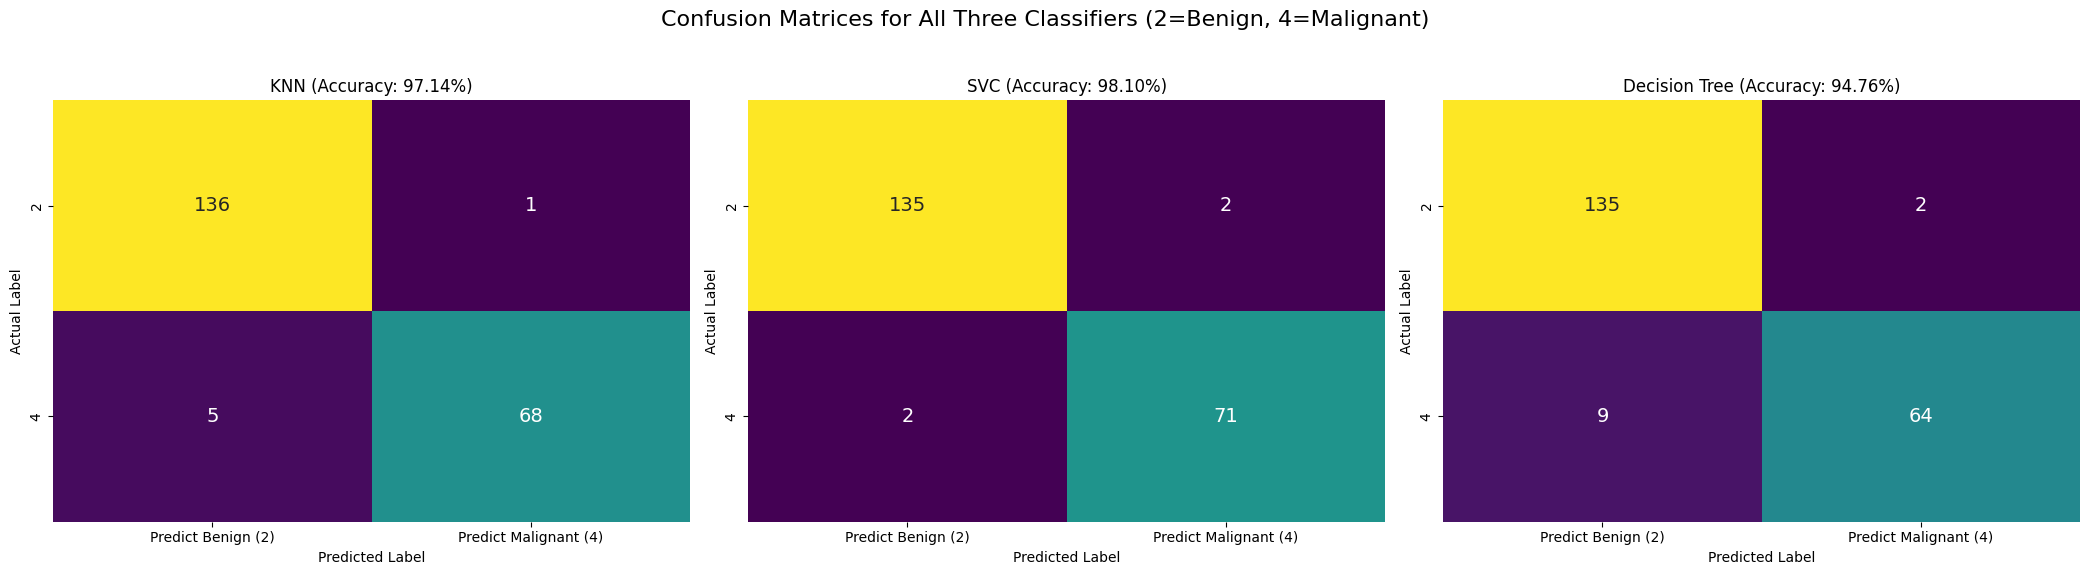

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Confusion Matrices for All Three Classifiers (2=Benign, 4=Malignant)', fontsize=16)

models = [
    ('KNN', predicted_1, axes[0], KNN.score(X_test, y_test)),
    ('SVC', predicted_2, axes[1], svc.score(X_test, y_test)),
    ('Decision Tree', predicted_3, axes[2], dtree.score(X_test, y_test))
]
for name, predictions, ax, score in models:
    # Use labels [2, 4] corresponding to the 'class' column values
    cm = metrics.confusion_matrix(y_test, predictions, labels=[2, 4])
    df_cm = pd.DataFrame(cm, index=[2, 4], columns=['Predict Benign (2)', 'Predict Malignant (4)'])

    sns.heatmap(df_cm, annot=True, fmt='d', cmap='viridis', ax=ax, cbar=False, annot_kws={"size": 14})
    ax.set_title(f'{name} (Accuracy: {score*100:.2f}%)')
    ax.set_ylabel('Actual Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [68]:

def get_fn(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred, labels=[2, 4])

    return cm[1][0]

print("\n--- Evaluating All Models on Test Data (Labels: 2=Benign, 4=Malignant) ---")

# --- 1. K-Nearest Neighbors (KNN) ---
Y_pred_knn = predicted_1
print("\n--- 1. K-Nearest Neighbors (KNN) ---")
print(f"Accuracy: {accuracy_score(y_test, Y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, Y_pred_knn, pos_label=4):.4f}")
print(f"Recall:   {recall_score(y_test, Y_pred_knn, pos_label=4):.4f}*100")
print(f"F1-Score: {f1_score(y_test, Y_pred_knn, pos_label=4):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, Y_pred_knn, labels=[2, 4])}")

# --- 2. Support Vector Classifier (SVC) ---
Y_pred_svc = predicted_2
print("\n--- 2. Support Vector Classifier (SVC) ---")
print(f"Accuracy: {accuracy_score(y_test, Y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, Y_pred_svc, pos_label=4):.4f}")
print(f"Recall:   {recall_score(y_test, Y_pred_svc, pos_label=4):.4f}")
print(f"F1-Score: {f1_score(y_test, Y_pred_svc, pos_label=4):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, Y_pred_svc, labels=[2, 4])}")

# --- 3. Decision Tree ---
Y_pred_dt = predicted_3
print("\n--- 3. Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_test, Y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, Y_pred_dt, pos_label=4):.4f}")
print(f"Recall:   {recall_score(y_test, Y_pred_dt, pos_label=4):.4f}")
print(f"F1-Score: {f1_score(y_test, Y_pred_dt, pos_label=4):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, Y_pred_dt, labels=[2, 4])}")




--- Evaluating All Models on Test Data (Labels: 2=Benign, 4=Malignant) ---

--- 1. K-Nearest Neighbors (KNN) ---
Accuracy: 0.9714
Precision: 0.9855
Recall:   0.9315*100
F1-Score: 0.9577
Confusion Matrix:
[[136   1]
 [  5  68]]

--- 2. Support Vector Classifier (SVC) ---
Accuracy: 0.9810
Precision: 0.9726
Recall:   0.9726
F1-Score: 0.9726
Confusion Matrix:
[[135   2]
 [  2  71]]

--- 3. Decision Tree ---
Accuracy: 0.9476
Precision: 0.9697
Recall:   0.8767
F1-Score: 0.9209
Confusion Matrix:
[[135   2]
 [  9  64]]


In [77]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def get_fn(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred, labels=[2, 4])
    return cm[1][0]

print("\n--- Model Comparison Summary ---")

results = pd.DataFrame({
    'Model': ['KNN', 'SVC', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, Y_pred_knn),
                 accuracy_score(y_test, Y_pred_svc),
                 accuracy_score(y_test, Y_pred_dt)],
    'F1-Score': [f1_score(y_test, Y_pred_knn, pos_label=4),
                 f1_score(y_test, Y_pred_svc, pos_label=4),
                 f1_score(y_test, Y_pred_dt, pos_label=4)],
   'Recall': [recall_score(y_test, Y_pred_knn, pos_label=4),
               recall_score(y_test, Y_pred_svc, pos_label=4),
               recall_score(y_test, Y_pred_dt, pos_label=4)],
    'False Negatives (FN)': [get_fn(y_test, Y_pred_knn),
                             get_fn(y_test, Y_pred_svc),
                             get_fn(y_test, Y_pred_dt)]

})

results_sorted = results.sort_values(by='F1-Score', ascending=False)
display(results_sorted.to_string(index=False))

print("\n" + "="*50)
print(" Identifying the Best Model")
print("--- Model Comparison Summary ---")


results_sorted = results.sort_values(by='F1-Score', ascending=False)

display(results_sorted)

print("\n*** The variable 'results_sorted' is now defined. ***")


--- Model Comparison Summary ---


'        Model  Accuracy  F1-Score   Recall  False Negatives (FN)\n          SVC  0.980952  0.972603 0.972603                     2\n          KNN  0.971429  0.957746 0.931507                     5\nDecision Tree  0.947619  0.920863 0.876712                     9'


 Identifying the Best Model
--- Model Comparison Summary ---


,Model,Accuracy,F1-Score,Recall,False Negatives (FN)
1,SVC,0.980952,0.972603,0.972603,2
0,KNN,0.971429,0.957746,0.931507,5
2,Decision Tree,0.947619,0.920863,0.876712,9



*** The variable 'results_sorted' is now defined. ***
